In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import regressors
from regressors import stats

In [2]:
df= pd.read_csv("C:/Users/SEBASTIAN/Documents/Cursos/curso_ciencia_de_datos/30_days_of_python/Regresion_lineal_con_sklearn/california_housing.csv", sep= ",")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
print(df.shape) #Conocer las dimensiones del dataset
df.dtypes #Conocer el tipo de variables

(20640, 10)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [4]:
df.isnull().sum() #Comprobar si hay datos nulos
df.drop_duplicates(inplace= True) #Eliminar duplicados
df= df.drop(["longitude", "latitude", "total_bedrooms"], axis=1) #Eliminar columnas 

In [5]:
df.shape #Conocer las nuevas dimensiones del dataset

(20640, 7)

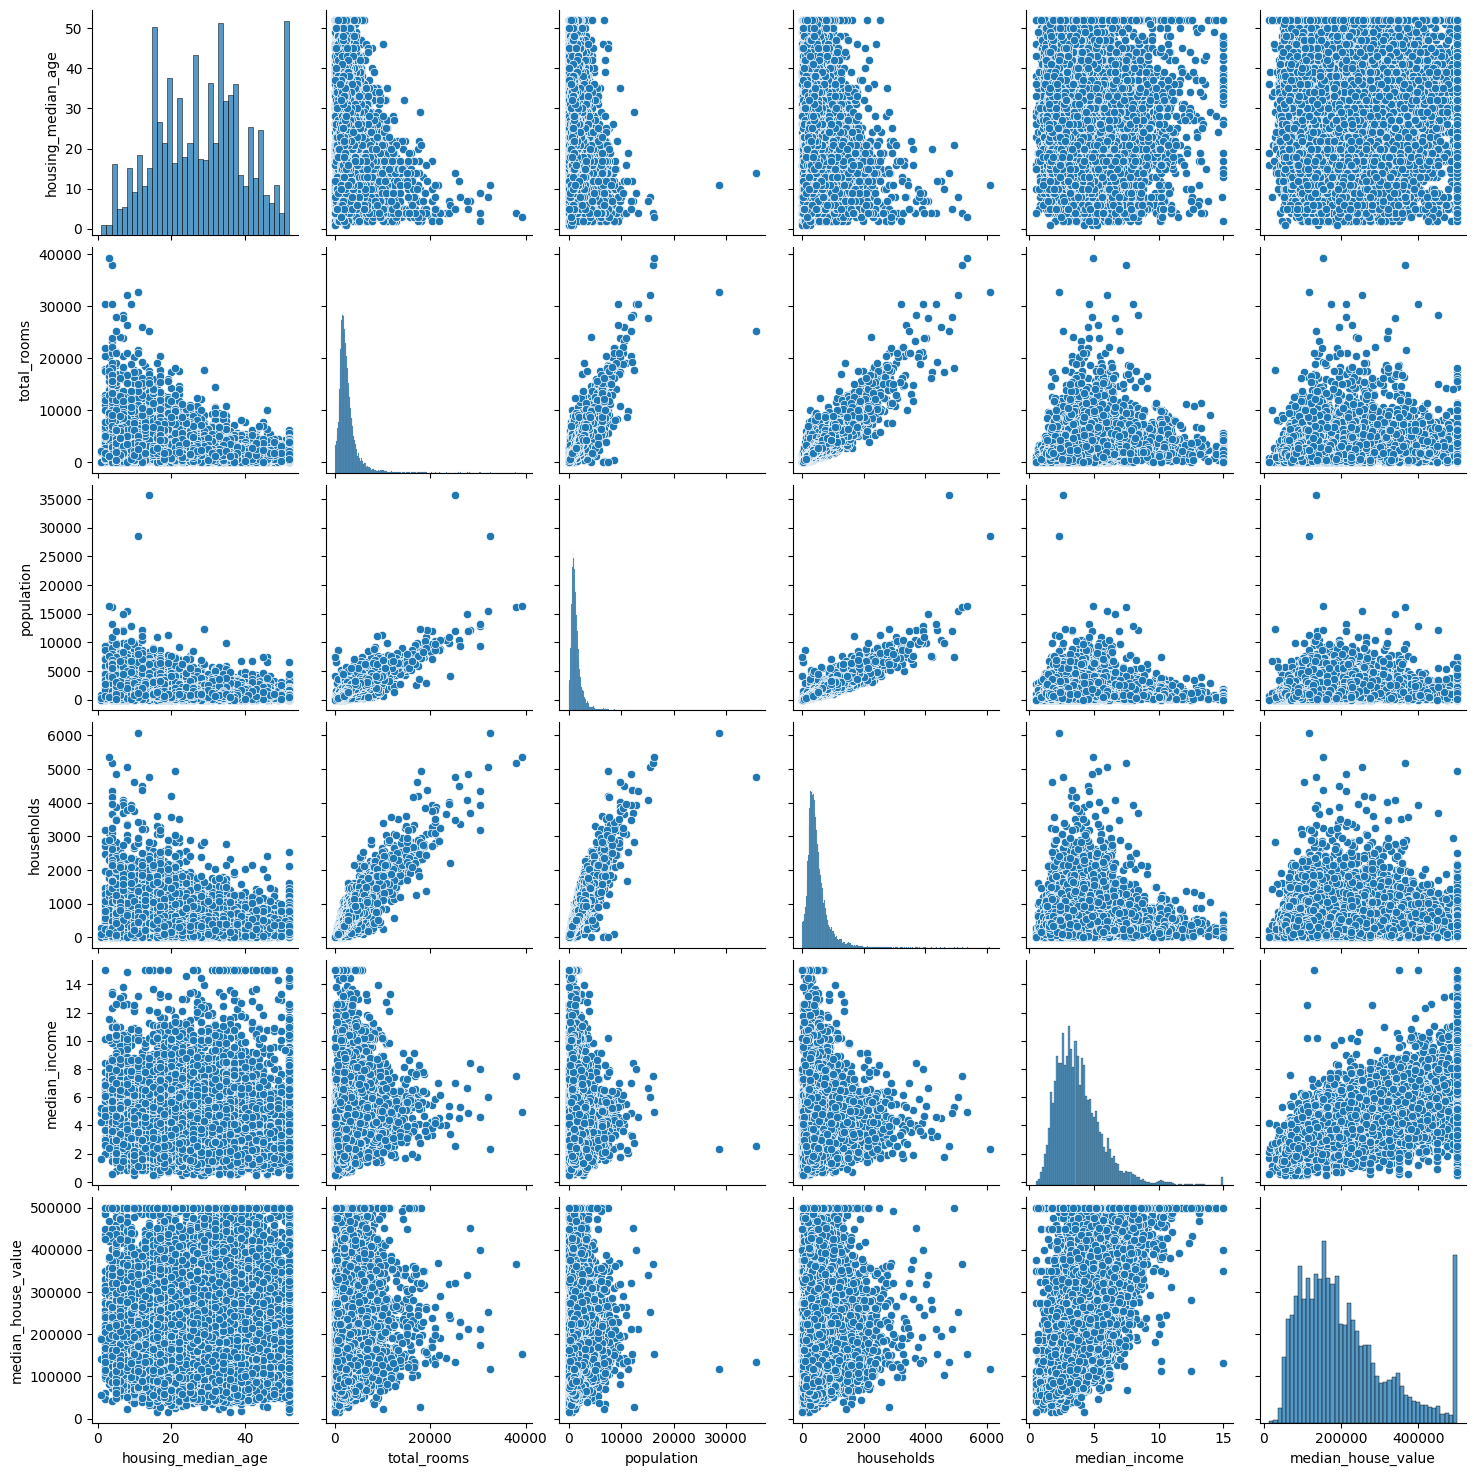

In [6]:
sns.pairplot(df)

<Axes: >

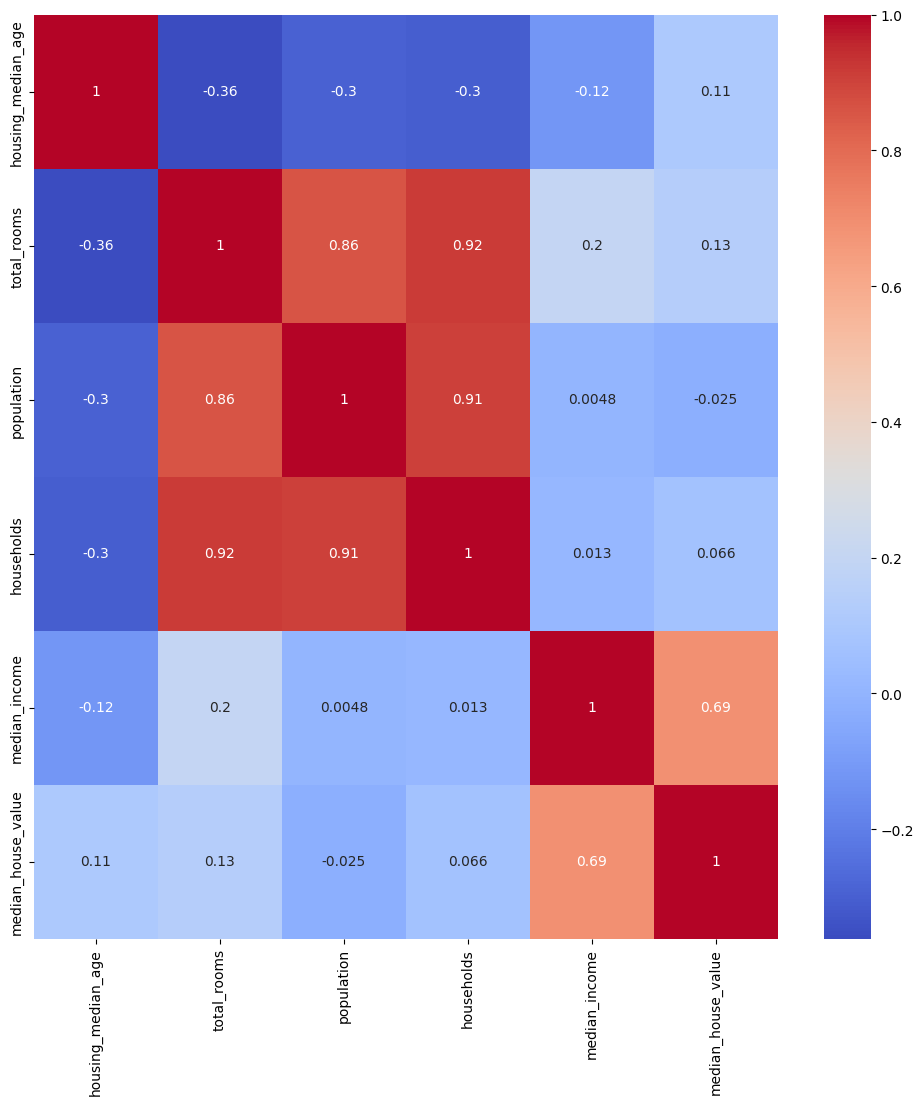

In [7]:
num_cols= df.select_dtypes(["float64", "int64"]).columns #Seleccionar las columnas numericas
df_numeric= df[num_cols] #Crear un df solamente de variables numericas

plt.figure(figsize= (12,12))
sns.heatmap(df_numeric.corr(), annot= True, cmap= "coolwarm")

In [8]:
df= pd.get_dummies(df, columns= ["ocean_proximity"], drop_first= True) #One hot enconding
df.head()

,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,52.0,1467.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,52.0,1274.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,52.0,1627.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [9]:
#CREAR EL MODELO DE REGRESION LINEAL
 
X= df.drop(columns="population")
y= df["population"]

#Seleccionar los valores
X= X.values
y= y.values.reshape(-1,1)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state=42) #Dividir los datos de entrenamiento y prueba

#Estandarizar y normalizar los datos
sc_x= StandardScaler()
X_train= sc_x.fit_transform(X_train)
X_test= sc_x.transform(X_test)

#Estandarizar la variable objetivo
sc_y= StandardScaler()
y_train= sc_y.fit_transform(y_train)
y_test= sc_y.transform(y_test)

model= LinearRegression() #Crear el modelo
model.fit(X_train, y_train) #Ajustar el modelo

predictions= model.predict(X_test) #Hacer predicciones

In [10]:
mse= metrics.mean_squared_error(y_test, predictions) #Calcular el error cuadratico medio
r2= metrics.r2_score(y_test, predictions) #Calcular el R2

print(f"MSE: {mse.round(3)}")
print(f"R2: {r2.round(3)}")

MSE: 0.146
R2: 0.842


In [11]:
# Ajustar los coeficientes del modelo
model.intercept_ =  model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [12]:
y_test = y_test.reshape(-1) #Convertir a un array de una dimension
xlabels = df.drop(columns=["population"]).columns # Obtener los nombres de las columnas de X

print("========",'Sumary',"======== \n")
stats.summary(model, X_test, y_test, xlabels)

======== Sumary ======== 

Residuals:
    Min      1Q  Median     3Q    Max
-7.3914 -0.1267  0.0301 0.1548 4.3944


Coefficients:
                            Estimate  Std. Error  t value   p value
_intercept                 -0.000000    0.005332  -0.0000  1.000000
housing_median_age          0.024269    0.006041   4.0174  0.000060
total_rooms                 0.197317    0.012839  15.3692  0.000000
households                  0.739926    0.012513  59.1315  0.000000
median_income               0.060290    0.007530   8.0071  0.000000
median_house_value         -0.169420    0.007768 -21.8098  0.000000
ocean_proximity_INLAND     -0.081401    0.006386 -12.7476  0.000000
ocean_proximity_ISLAND      0.000363    0.006158   0.0589  0.952995
ocean_proximity_NEAR BAY   -0.056363    0.005809  -9.7027  0.000000
ocean_proximity_NEAR OCEAN -0.030751    0.005355  -5.7421  0.000000
---
R-squared:  0.84207,    Adjusted R-squared:  0.84180
F-statistic: 3051.15 on 9 features


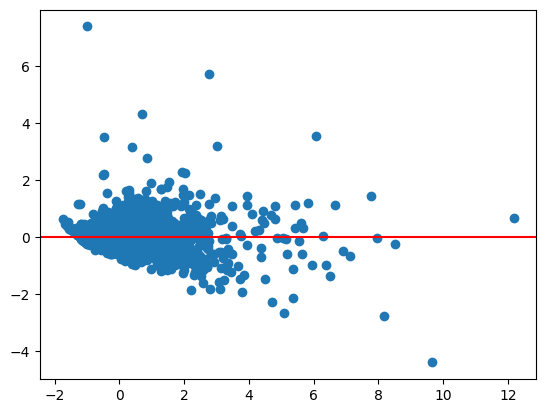

In [13]:
predictions= predictions.reshape(-1) #Convertir a un array de una dimension
residuals= y_test - predictions
plt.scatter(predictions, residuals) 
plt.axhline(y=0, color= "red", linestyle= "-") #La idea es que los valores se situen sobre el 0